**LabDS03a**

Considerieng several variables corresponding to international indicator. The purpose of this study is creating a model to explain the Co2 emissions.



1. Import data 

Import data and create new varible (discretize variable)

In [1]:
#Importar bibliotecas
import pandas as pd
import numpy as np

In [2]:
#Extrair dados
url='Mundo94Var.xls'
df=pd.read_excel(url)

In [3]:
#Criar um dataset 
#fui buscar as variaveis que achei mais interessantes
XY=df[['CO2 emissions (metric tons per capita)',
        'Urban population (% of total population)',
        'Population density (people per sq. km of land area)',
        'Secure Internet servers (per 1 million people)',
        'Mobile cellular subscriptions (per 100 people)',
        'Life expectancy at birth, total (years)',
        'Access to electricity (% of population)'
       ]]

#LIMPAR O DATASET
#Apaga todas as linhas que não tenham dados, importante ter um dataset limpo
XY=XY.dropna()
Y=XY['CO2 emissions (metric tons per capita)']
#Eliminar a coluna 
Xfeatures=XY.drop(['CO2 emissions (metric tons per capita)'],axis=1)

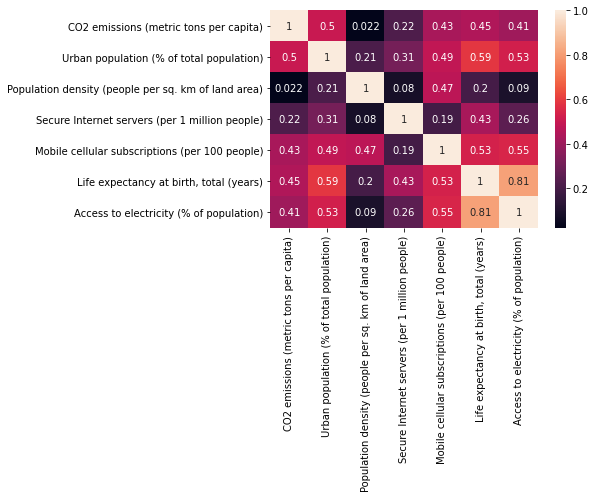

In [4]:
#Analisar a correlacao entre os dados
#Ver se os dados estao muitos dispersos entre si 
#Se houver uma grande correlacao quer dizer que os dados estao proximos de 1
#Como pudemos ver alguns exemplos no heatmap em baixo

XY.corr()
#Seaborn é uma das bibliotecas que pudemos utilizar para fazer graficos 
import seaborn as sn
import matplotlib.pyplot as plt
#Criar matriz correlacao
corrMatrix = XY.corr()
#Heatmap - Permite ligar um conjunto de valores, quanto mais proximo de 1 melhor
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [5]:
import statsmodels.api as sm
#Mostra como output o que ja conhecemos 
#Permite fazer uma analise dos dados que ja fizemos 
#OLS - Ordinaty least square
model = sm.OLS(Y, Xfeatures)
#Fazer fit ao modelo
result = model.fit()
result.summary()

#R^2 nao esta bom
#Dubin-watson tem que estar o mais perto de 2 possivel

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     CO2 emissions (metric tons per capita)   R-squared (uncentered):                   0.572
Model:                                                OLS   Adj. R-squared (uncentered):              0.558
Method:                                     Least Squares   F-statistic:                              39.91
Date:                                    Tue, 24 Nov 2020   Prob (F-statistic):                    1.36e-30
Time:                                            10:32:44   Log-Likelihood:                         -558.76
No. Observations:                                     185   AIC:                                      1130.
Df Residuals:                                         179   BIC:                                      1149.
Df Model:                                               6                                                  
Covariance Type:                                nonrobust                                                  
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Urban population (% of total population)                0.0924      0.020      4.552      0.000       0.052       0.132
Population density (people per sq. km of land area)    -0.0007      0.000     -2.656      0.009      -0.001      -0.000
Secure Internet servers (per 1 million people)          0.0001    7.4e-05      1.400      0.163   -4.24e-05       0.000
Mobile cellular subscriptions (per 100 people)          0.0456      0.013      3.448      0.001       0.020       0.072
Life expectancy at birth, total (years)                -0.1128      0.026     -4.320      0.000      -0.164      -0.061
Access to electricity (% of population)                 0.0299      0.021      1.402      0.163      -0.012       0.072
==============================================================================
Omnibus:                      143.626   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1532.387
Skew:                           2.911   Prob(JB):                         0.00
Kurtosis:                      15.841   Cond. No.                         465.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#Maneira de indetificar quais sao as features mais indicadas
# Feature Extraction with RFE - Recursive feature extraction
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Feature selection
# Usar regressao dentro da abordagem
model = LinearRegression()
#Quero as 5 melhores variaveis
rfe = RFE(model, 3)
#Faco o fit e tenho o resultado
fit = rfe.fit(Xfeatures, Y)
#Quais sao as features que tenho
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [ True  True False  True  True  True]
Feature Ranking: [1 1 2 1 1 1]


/Users/sergiocosta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
